# Experimentos baseados em Deep Learning

- Utilizando cada paredão como teste e avaliando com holdout.

In [1]:
import pandas as pd 
import numpy as np 
from regression_utils import *
import fastai
from fastai.tabular import *

In [2]:
NORMALIZE = False
EPOCHS = 30
LAYERS = [20, 20]
LR = 1e-2
DEVICE="TODO"

In [3]:
summary_df = pd.DataFrame(columns=COLUMNS)

# Paredao 1

In [4]:
train_df, test_df = get_train_test(1, normalize=NORMALIZE)

In [5]:
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594


In [6]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [7]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [8]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.482646,0.006456,0.006456,00:00
1,0.451051,0.009013,0.009013,00:00
2,0.423495,0.006737,0.006737,00:00
3,0.375483,0.014684,0.014684,00:00
4,0.355163,0.074014,0.074014,00:00
5,0.298094,0.140894,0.140894,00:00
6,0.247381,0.173861,0.173861,00:00
7,0.224041,0.112962,0.112962,00:00
8,0.200162,0.130534,0.130534,00:00
9,0.192055,0.105634,0.105634,00:00


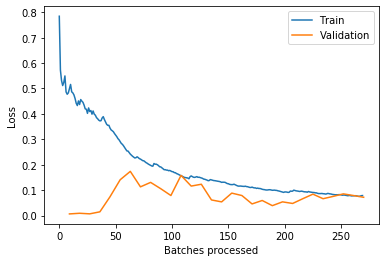

In [9]:
learner.recorder.plot_losses()

In [10]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [11]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [12]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594,0.820246
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446,0.291797


# Paredao 2

In [13]:
train_df, test_df = get_train_test(2, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863


In [14]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [15]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [16]:
learner.fit_one_cycle(EPOCHS, LR)


epoch,train_loss,valid_loss,mean_squared_error,time
0,0.274262,0.091466,0.091466,00:00
1,0.288063,0.108194,0.108194,00:00
2,0.239289,0.132727,0.132727,00:00
3,0.216796,0.264317,0.264317,00:00
4,0.172549,0.194321,0.194321,00:00
5,0.157419,0.273707,0.273707,00:00
6,0.144685,0.319950,0.319950,00:00
7,0.133248,0.184292,0.184292,00:00
8,0.125893,0.103908,0.103908,00:00
9,0.116614,0.094724,0.094724,00:00


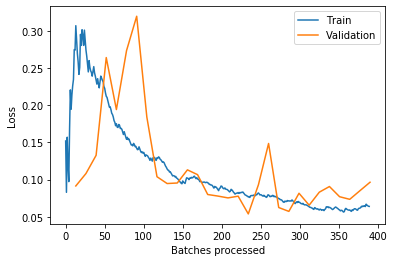

In [17]:
learner.recorder.plot_losses()

In [18]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [19]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [20]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,0.599699
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,0.436145
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.242457
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,-0.025792


# Paredao 3

In [21]:
train_df, test_df = get_train_test(3, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971


In [22]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [23]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [24]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.617132,0.306563,0.306563,00:00
1,0.521128,0.148819,0.148819,00:00
2,0.490035,0.182276,0.182276,00:00
3,0.425389,0.166309,0.166309,00:00
4,0.413208,0.126159,0.126159,00:00
5,0.346307,0.079918,0.079918,00:00
6,0.283638,0.152081,0.152081,00:00
7,0.256888,0.125340,0.125340,00:00
8,0.215283,0.138526,0.138526,00:00
9,0.192507,0.118849,0.118849,00:00


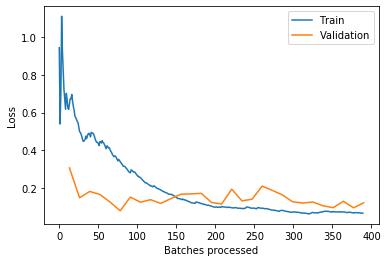

In [25]:
learner.recorder.plot_losses()

In [26]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [27]:

test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [28]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029,0.360538
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971,0.358304


# Paredao 4

In [29]:
train_df, test_df = get_train_test(4, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
29,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130
30,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608
31,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262


In [30]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [31]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.352867,0.178445,0.178445,00:00
1,0.356345,0.241291,0.241291,00:00
2,0.338419,0.159607,0.159607,00:00
3,0.278571,0.100260,0.100260,00:00
4,0.231250,0.075984,0.075984,00:00
5,0.205626,0.093646,0.093646,00:00
6,0.179867,0.090589,0.090589,00:00
7,0.157165,0.060706,0.060706,00:00
8,0.144418,0.065571,0.065571,00:00
9,0.128004,0.037816,0.037816,00:00


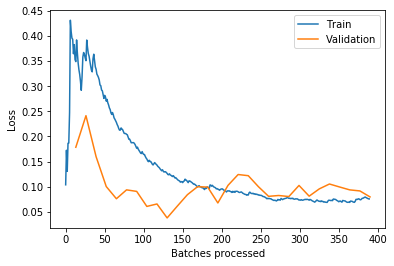

In [32]:
learner.recorder.plot_losses()

In [33]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [34]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [35]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
31,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262,0.396886
29,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130,0.360656
30,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608,0.243423


# Paredao 5

In [36]:
train_df, test_df = get_train_test(5, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927


In [37]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [38]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.553068,0.707876,0.707876,00:00
1,0.542042,1.138428,1.138428,00:00
2,0.505044,1.453711,1.453711,00:00
3,0.475421,0.625704,0.625704,00:00
4,0.402966,0.251944,0.251944,00:00
5,0.332217,0.242289,0.242289,00:00
6,0.272754,0.242700,0.242700,00:00
7,0.230437,0.077278,0.077278,00:00
8,0.208031,0.074970,0.074970,00:00
9,0.185756,0.047438,0.047438,00:00


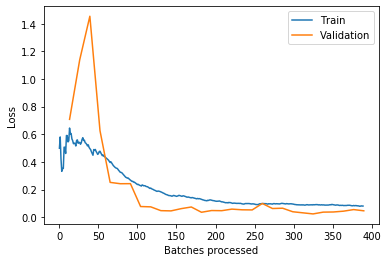

In [39]:
learner.recorder.plot_losses()

In [40]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [41]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [42]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927,0.335462
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309,0.294813
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764,0.201118


# Paredao 6

In [43]:
train_df, test_df = get_train_test(6, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329


In [44]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [45]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.548680,0.124767,0.124767,00:00
1,0.500748,0.252280,0.252280,00:00
2,0.409824,0.084139,0.084139,00:00
3,0.365069,0.027475,0.027475,00:00
4,0.277169,0.070798,0.070798,00:00
5,0.218604,0.046499,0.046499,00:00
6,0.191137,0.072007,0.072007,00:00
7,0.180245,0.095372,0.095372,00:00
8,0.161337,0.203051,0.203051,00:00
9,0.151017,0.073544,0.073544,00:00


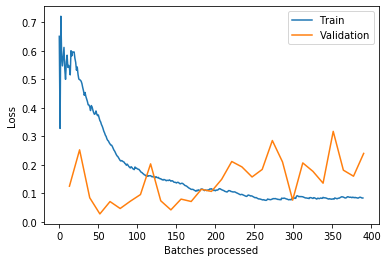

In [46]:
learner.recorder.plot_losses()

In [47]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [48]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [49]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064,0.436731
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607,0.430765
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329,0.370778


# Paredao 7

In [50]:
train_df, test_df = get_train_test(7, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522


In [51]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [52]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.735079,0.330200,0.330200,00:00
1,0.759259,0.502791,0.502791,00:00
2,0.723143,0.894021,0.894021,00:00
3,0.588276,1.003232,1.003232,00:00
4,0.504439,0.641678,0.641678,00:00
5,0.412221,0.347299,0.347299,00:00
6,0.337219,0.848417,0.848417,00:00
7,0.279965,4.141063,4.141063,00:00
8,0.240085,1.069239,1.069239,00:00
9,0.223347,0.328946,0.328946,00:00


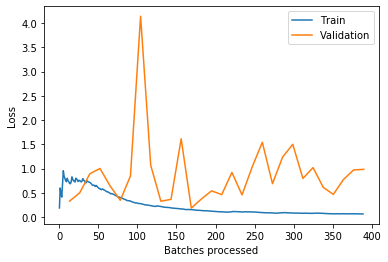

In [53]:
learner.recorder.plot_losses()

In [54]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [55]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [56]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522,0.290693
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460,0.271695
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018,-0.199085



# Paredao 8

In [57]:
train_df, test_df = get_train_test(8, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170


In [58]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [59]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.513741,0.383665,0.383665,00:00
1,0.386922,0.224590,0.224590,00:00
2,0.344645,0.540990,0.540990,00:00
3,0.284561,0.219222,0.219222,00:00
4,0.230897,0.138016,0.138016,00:00
5,0.217153,0.433377,0.433377,00:00
6,0.209058,0.124663,0.124663,00:00
7,0.211634,0.182432,0.182432,00:00
8,0.194522,0.592568,0.592568,00:00
9,0.169300,1.044639,1.044639,00:00


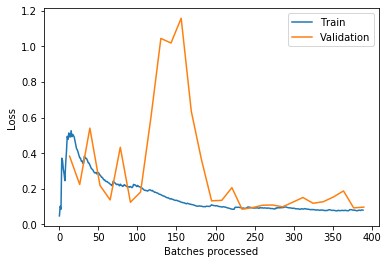

In [60]:
learner.recorder.plot_losses()

In [61]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [62]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [63]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059,0.332182
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771,0.299464
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170,0.201372


# Paredão 9

In [64]:
train_df, test_df = get_train_test(9, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964


In [65]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [66]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.522548,0.560419,0.560419,00:00
1,0.415226,1.647205,1.647205,00:00
2,0.387596,4.527234,4.527234,00:00
3,0.298501,2.056710,2.056710,00:00
4,0.259855,1.295937,1.295937,00:00
5,0.240210,0.860746,0.860746,00:00
6,0.200658,0.227539,0.227539,00:00
7,0.173499,0.166842,0.166842,00:00
8,0.169691,0.844499,0.844499,00:00
9,0.169107,0.189028,0.189028,00:00


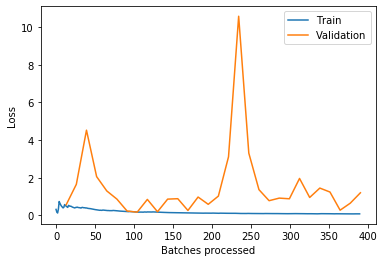

In [67]:
learner.recorder.plot_losses()

In [68]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [69]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [70]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082,0.290752
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964,0.234547
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954,0.208881


# Paredão 10

In [71]:
train_df, test_df = get_train_test(10, normalize=NORMALIZE)
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673


In [72]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [73]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.716499,0.235434,0.235434,00:00
1,0.581167,0.301390,0.301390,00:00
2,0.544577,0.290395,0.290395,00:00
3,0.457455,0.387674,0.387674,00:00
4,0.440553,0.234251,0.234251,00:00
5,0.355843,0.070257,0.070257,00:00
6,0.296978,0.095828,0.095828,00:00
7,0.234170,0.054652,0.054652,00:00
8,0.195082,0.077570,0.077570,00:00
9,0.170512,0.023532,0.023532,00:00


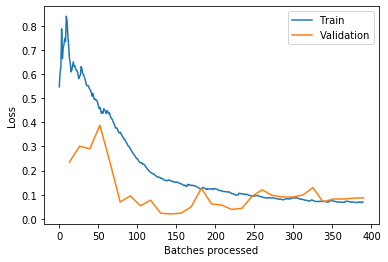

In [74]:
learner.recorder.plot_losses()

In [75]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [76]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [77]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251,1.026283
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673,0.680358
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076,0.253028


# Paredão 11

In [78]:
train_df, test_df = get_train_test(11, normalize=NORMALIZE)
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
26,11,babu,20279,20221,25199,0.308665,0.307782,0.383552,0.370075,0.326630,0.340651,34274,22080,9345,1665136,256280,638797,0.0411
27,11,gabi,16563,16875,21773,0.299995,0.305646,0.394360,0.302261,0.272582,0.294337,31402,15752,8057,1077768,170734,237780,0.5961
28,11,thelma,17955,24812,27001,0.257353,0.355636,0.387011,0.327664,0.400788,0.365012,27203,30219,12346,1936851,246960,385019,0.3628


In [79]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [80]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.387633,0.182682,0.182682,00:00
1,0.382008,0.084718,0.084718,00:00
2,0.358358,0.119470,0.119470,00:00
3,0.345467,0.069072,0.069072,00:00
4,0.279134,0.195920,0.195920,00:00
5,0.259911,0.024927,0.024927,00:00
6,0.215348,0.019480,0.019480,00:00
7,0.206217,0.037240,0.037240,00:00
8,0.191261,0.054757,0.054757,00:00
9,0.179499,0.013812,0.013812,00:00


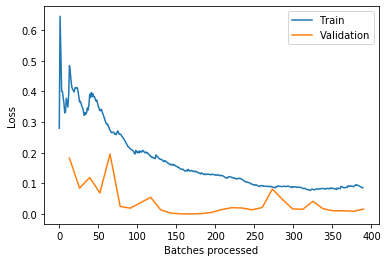

In [81]:
learner.recorder.plot_losses()

In [82]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [83]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [84]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
28,11,thelma,17955,24812,27001,0.257353,0.355636,0.387011,0.327664,0.400788,0.365012,27203,30219,12346,1936851,246960,385019,0.3628,0.386507
27,11,gabi,16563,16875,21773,0.299995,0.305646,0.394360,0.302261,0.272582,0.294337,31402,15752,8057,1077768,170734,237780,0.5961,0.355922
26,11,babu,20279,20221,25199,0.308665,0.307782,0.383552,0.370075,0.326630,0.340651,34274,22080,9345,1665136,256280,638797,0.0411,0.353052


# Sumarizando

In [85]:
summary_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
0,1,bianca_andrade,5102,5230,3762,0.361998,0.371080,0.266922,0.483052,0.326345,0.207010,5849,5903,2342,407879,57730,411880,0.2446,0.291797
1,1,lucas_chumbo,5460,10796,14411,0.178042,0.352040,0.469919,0.516948,0.673655,0.792990,22759,5502,2406,667691,132858,12014,0.7594,0.820246
2,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,-0.025792
3,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,0.599699
4,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.242457
5,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,0.436145
6,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.546440,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029,0.360538
7,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.453560,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971,0.358304
8,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130,0.360656
9,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608,0.243423
